# Visualization and plotting

First things first: ensure matplotlib is installed using:
***pip install matplotlib***

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#Jupyter notebook

C:\Users\u0167016\AppData\Local\Temp\ipykernel_23608\2130642497.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Background information

**Matplotlib** graphs your data on **Figures** (e.g., windows, Jupyter widgets, etc.), each of which can contain:
* One or more Axes: an area where points can be specified in terms of x-y(-z) coordinates

The simplest way of creating a Figure with an Axes is using pyplot.subplots. We can then use Axes.plot to draw some data on the Axes:

--> Let's create a figure with one axes  

As we do not specify any other information or data, the figure is still empty.

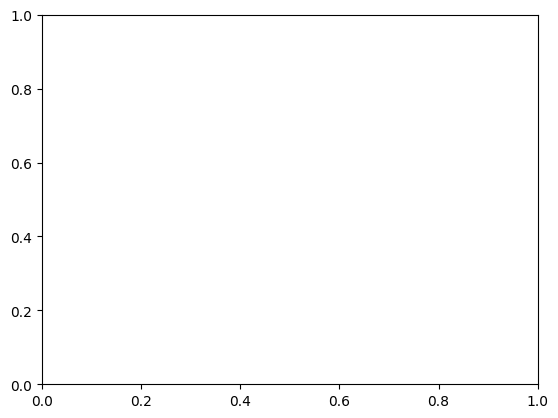

In [7]:
fig, ax = plt.subplots()

Let's add some data to the plot.
You will see that the axes ticks adapt to the values of the data.

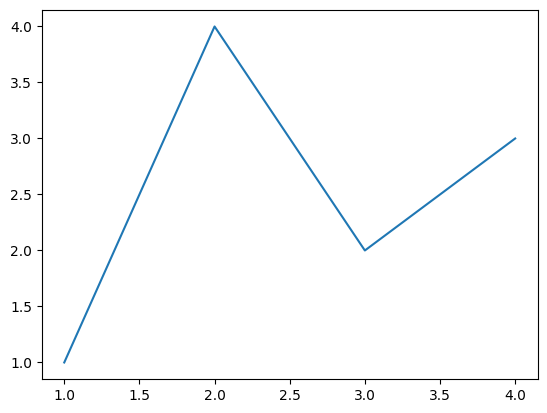

In [8]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4],[1,4,2,3])
#plt.show()

### The building blocks of matplotlib

#### Figure
A figure keeps track of 
* all the child axes
* a group of 'special' Artists (titles, figure legends, colorbars etc.)
* nested subfigures

Easiest way to create a new Figure is with pyplot:

In [9]:
fig = plt.figure()  # an empty figure with no Axes

<Figure size 640x480 with 0 Axes>

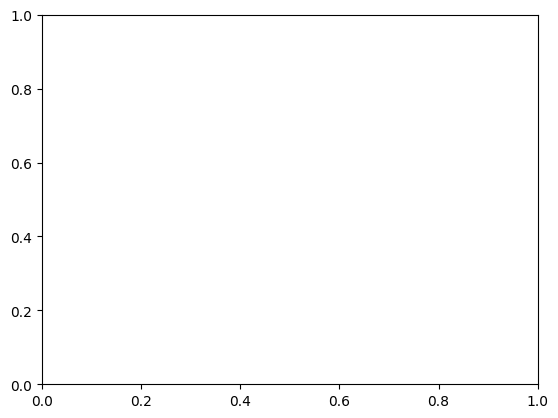

In [10]:
fig, ax = plt.subplots()  # a figure with a single Axes

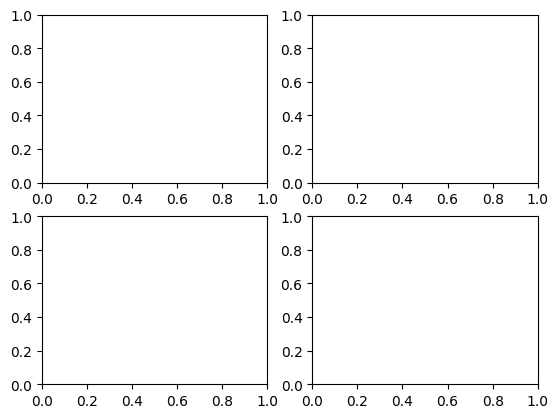

In [11]:
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

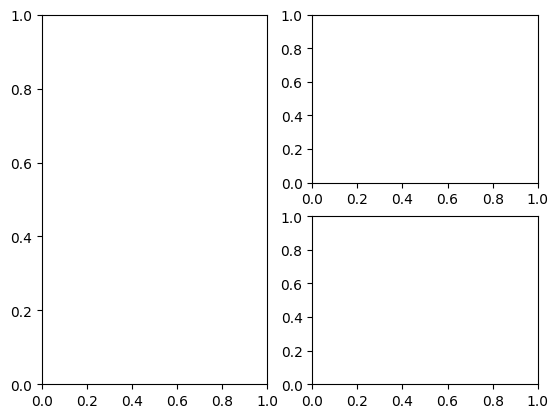

In [12]:
# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

#### Axes
An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes 
* two (or three in case of 3D) Axis objects (difference!)
* a title: `set_title()`
* an x-label: `set_xlabel()`
* a y-label: `set_ylabel()`

Text(0.5, 1.0, "I'm a title")

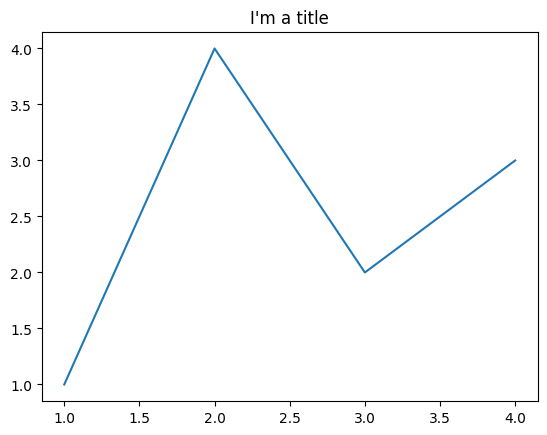

In [13]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4],[1,4,2,3])


ax.set_title("I'm a title")

#### Axis
These objects set the **scale** and **limits**. They generate:
* ticks (the marks on the Axis)
* ticklabels (strings labeling the ticks)
The location of the ticks is determined by a `Locator` object and the ticklabel strings are formated by a `Formatter`.

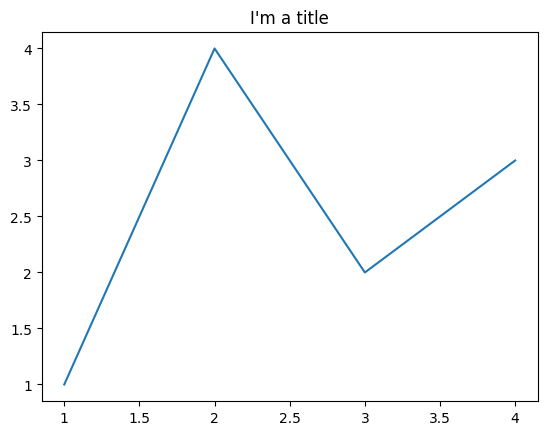

In [14]:
import matplotlib
import matplotlib.ticker
fig, ax = plt.subplots()
ax.plot([1,2,3,4],[1,4,2,3])
ax.set_title("I'm a title")

al = matplotlib.ticker.AutoLocator()
ax.xaxis.set_major_locator(al)
ax.xaxis.set_minor_locator(al)
ax.yaxis.set_major_locator(al)
ax.yaxis.set_minor_locator(al)

ef = matplotlib.ticker.EngFormatter() #format labels in engineering notation
ax.xaxis.set_major_formatter(ef)
ax.xaxis.set_minor_formatter(ef)
ax.yaxis.set_major_formatter(ef)
ax.yaxis.set_minor_formatter(ef)

#### Artist
Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another. 

#### Overview

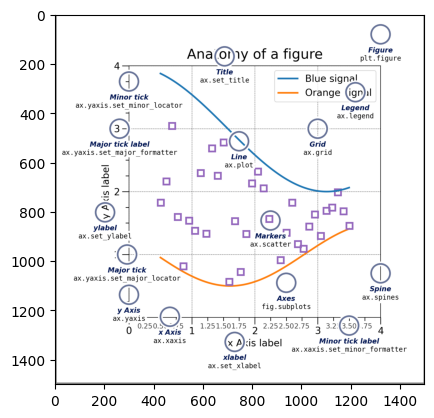

In [15]:
from PIL import Image
img = np.asarray(Image.open(r'matplotlib.png'))
imgplot = plt.imshow(img)

### Coding styles

Two ways of using Matplotlib
* An **explicit** "Axes" interface that uses methods on a Figure or Axes object to create other Artists, and build a visualization step by step. This has also been called an "object-oriented" interface.
    - Building visualizations step by step
    - When adding visualizations, it should be clear to which Figure.
    - Used above
* An **implicit** "pyplot" interface that keeps track of the last Figure and Axes created, and adds Artists to the object it thinks the user wants. Use pyplot functions for plotting.
    - The pyplot module shadows most of the Axes plotting methods to give the equivalent of the above, where the creation of the Figure and Axes is done for the user
    - Convenient for interactive work or simple scripts
    - `gcf` to reference the current Figure
    - `gca`to reference the current Axes.
    - It 'remembers' the last Figure and Axes.

##### Explicit example

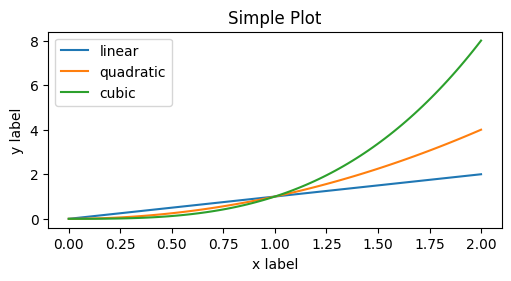

In [16]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

##### Implicit example

In [ ]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

[Matplotlib documentation](https://matplotlib.org/stable/)